In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
inventory = pd.read_csv("corrected_inventory_monthly2024new.csv")
sales = pd.read_csv("corrected_sales_with_prices.csv")
stores = pd.read_csv("delhi_store_branches.csv")
products = pd.read_csv("real_products_100.csv")
customers = pd.read_csv("customers_simple_ids.csv")
inventory.head()


,store_id,product_id,month,opening_stock,stock_added,stock_sold,closing_stock,stockout_flag
0,1,1,2023-12,40,158,19,179,0
1,1,2,2023-12,21,249,31,239,0
2,1,3,2023-12,82,54,24,112,0
3,1,4,2023-12,165,265,32,398,0
4,1,5,2023-12,103,99,12,190,0


In [36]:
inventory.info()
sales.info()
stores.info()
products.info()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   store_id       72000 non-null  int64 
 1   product_id     72000 non-null  int64 
 2   month          72000 non-null  object
 3   opening_stock  72000 non-null  int64 
 4   stock_added    72000 non-null  int64 
 5   stock_sold     72000 non-null  int64 
 6   closing_stock  72000 non-null  int64 
 7   stockout_flag  72000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         54000 non-null  int64  
 1   product_id       54000 non-null  int64  
 2   month            54000 non-null  object 
 3   corrected_sales  54000 non-null  int64  
 4   unit_price       54000 

In [37]:
df = inventory.merge(
    sales,
    on=["store_id", "product_id", "month"],
    how="inner"
)


In [84]:
corr = df[[
    "corrected_sales",
    "opening_stock",
    "stock_added",
    "closing_stock",
    "stockout_flag"
]].corr()

print(corr)


                 corrected_sales  opening_stock  stock_added  closing_stock  \
corrected_sales         1.000000       0.399914     0.304076       0.440812   
opening_stock           0.399914       1.000000     0.007555       0.830343   
stock_added             0.304076       0.007555     1.000000       0.559494   
closing_stock           0.440812       0.830343     0.559494       1.000000   
stockout_flag          -0.006568      -0.007406    -0.009949      -0.011575   

                 stockout_flag  
corrected_sales      -0.006568  
opening_stock        -0.007406  
stock_added          -0.009949  
closing_stock        -0.011575  
stockout_flag         1.000000  


In [53]:
df.head()

,store_id,product_id,month,opening_stock,stock_added,stock_sold,closing_stock,stockout_flag,corrected_sales,unit_price,total_price
0,1,1,2023-12,40,158,19,179,0,19,431.31,8194.89
1,1,2,2023-12,21,249,31,239,0,31,83.52,2589.12
2,1,3,2023-12,82,54,24,112,0,24,383.75,9210.00
3,1,4,2023-12,165,265,32,398,0,32,457.76,14648.32
4,1,5,2023-12,103,99,12,190,0,12,78.25,939.00


In [81]:
df["new_month"] = df["month"].str.slice(0,4)
df.head()
newdf=df[df["new_month"]=='2023']
newdf.head()

,store_id,product_id,month,opening_stock,stock_added,stock_sold,closing_stock,stockout_flag,corrected_sales,unit_price,total_price,new_month
0,1,1,2023-12,40,158,19,179,0,19,431.31,8194.89,2023
1,1,2,2023-12,21,249,31,239,0,31,83.52,2589.12,2023
2,1,3,2023-12,82,54,24,112,0,24,383.75,9210.00,2023
3,1,4,2023-12,165,265,32,398,0,32,457.76,14648.32,2023
4,1,5,2023-12,103,99,12,190,0,12,78.25,939.00,2023


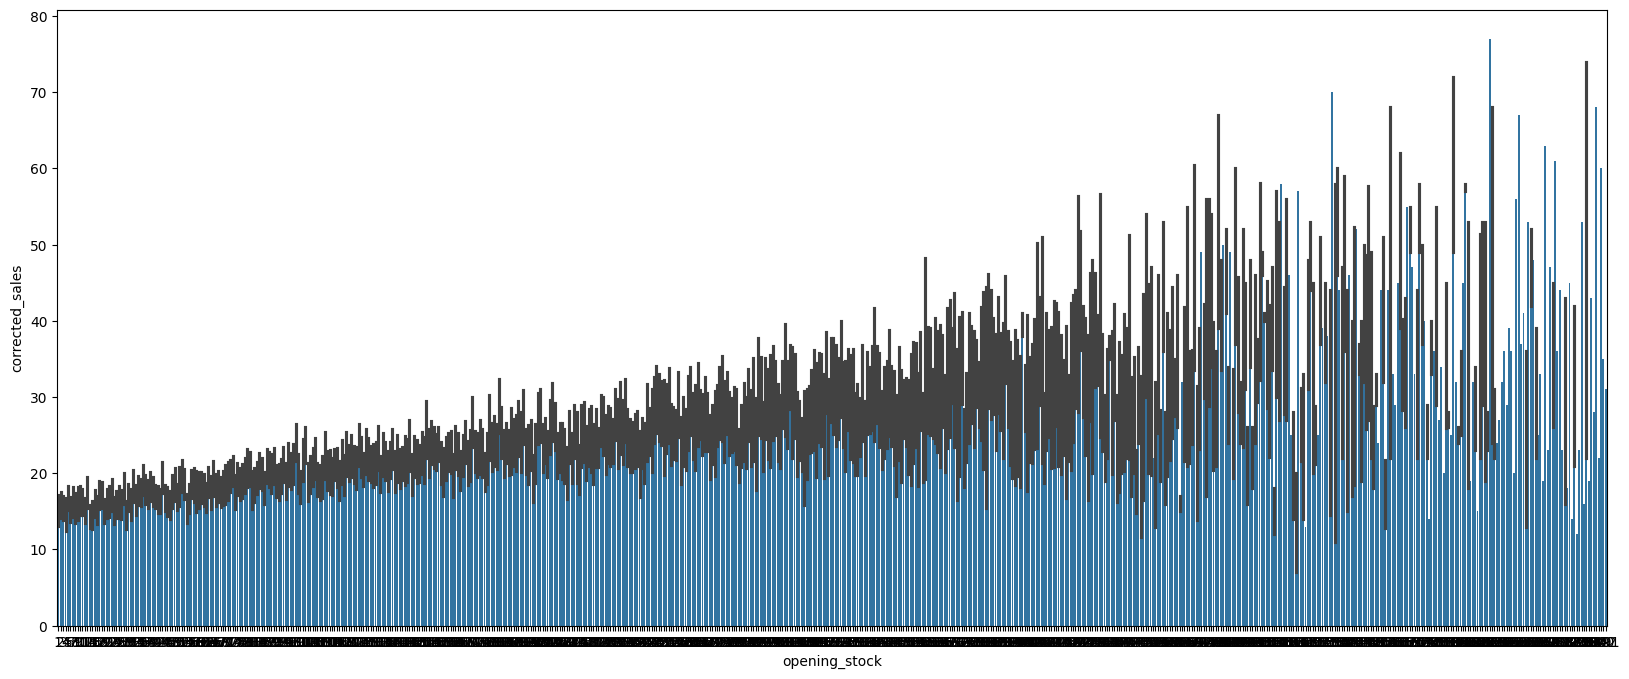

In [83]:
plt.figure(figsize=(20,8))
sns.barplot(x='opening_stock',y='corrected_sales',data=newdf)
plt.show()

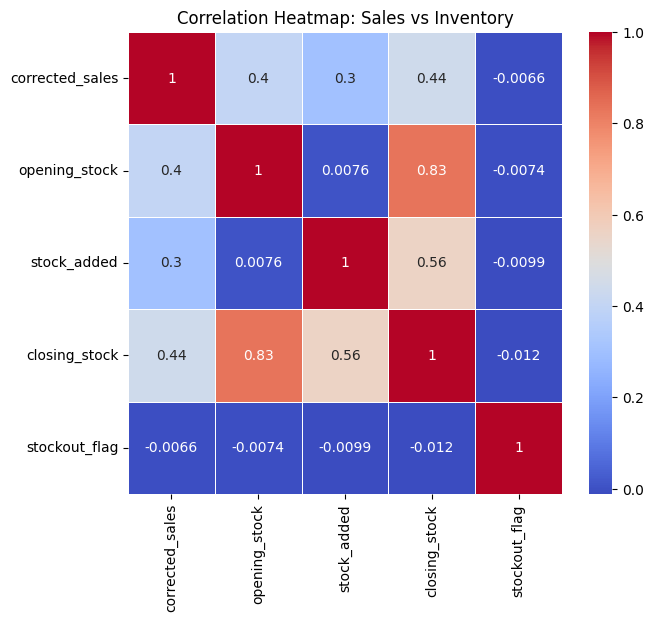

In [85]:
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap: Sales vs Inventory")
plt.show()